<a href="https://colab.research.google.com/github/intu99/ML-Agent/blob/master/TFLight02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip Volcanic.zip

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
img_height,img_width=32,32
batch_size=10

train_ds=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Volcanic/train",image_size=(img_height,img_width),batch_size=batch_size)
val_ds=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Volcanic/validation",image_size=(img_height,img_width),batch_size=batch_size)
test_ds=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Volcanic/test",image_size=(img_height,img_width),batch_size=batch_size)
class_names=["andesite","basalt","diabase","diorite","dioriteporphyrite","gabbro","granite","granodiorite","quantzporphyry","rhyolite"]
print(class_names)


Found 700 files belonging to 10 classes.
Found 100 files belonging to 10 classes.
Found 200 files belonging to 10 classes.
['andesite', 'basalt', 'diabase', 'diorite', 'dioriteporphyrite', 'gabbro', 'granite', 'granodiorite', 'quantzporphyry', 'rhyolite']


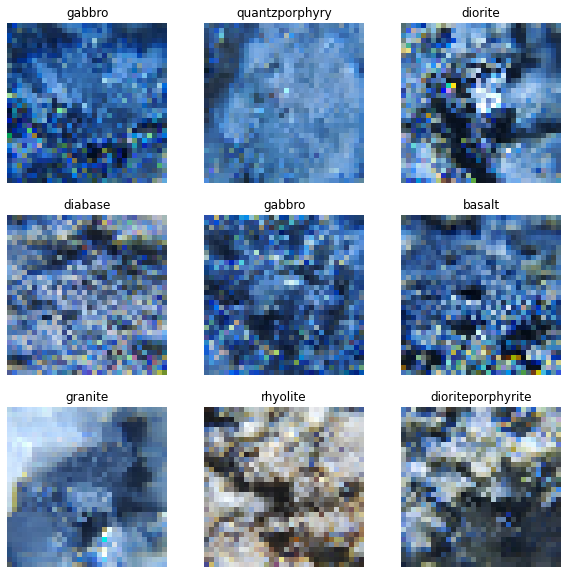

In [36]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [37]:
model=tf.keras.Sequential(
    [
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10)
    ]
)
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [38]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
70/70 [==============================] - 8s 97ms/step - loss: 2.2867 - accuracy: 0.1186 - val_loss: 2.0483 - val_accuracy: 0.2300
Epoch 2/20
70/70 [==============================] - 8s 102ms/step - loss: 2.0851 - accuracy: 0.2114 - val_loss: 1.7669 - val_accuracy: 0.3100
Epoch 3/20
70/70 [==============================] - 7s 96ms/step - loss: 1.8602 - accuracy: 0.2986 - val_loss: 1.6561 - val_accuracy: 0.3000
Epoch 4/20
70/70 [==============================] - 7s 98ms/step - loss: 1.7874 - accuracy: 0.2914 - val_loss: 1.5682 - val_accuracy: 0.3500
Epoch 5/20
70/70 [==============================] - 8s 101ms/step - loss: 1.6297 - accuracy: 0.3371 - val_loss: 1.4595 - val_accuracy: 0.3600
Epoch 6/20
70/70 [==============================] - 8s 100ms/step - loss: 1.6675 - accuracy: 0.3571 - val_loss: 1.4450 - val_accuracy: 0.4300
Epoch 7/20
70/70 [==============================] - 8s 107ms/step - loss: 1.6462 - accuracy: 0.3657 - val_loss: 1.4530 - val_accuracy: 0.4000
Epoch 8/2

In [ ]:

model.evaluate(test_ds)
import numpy
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    classifications=model(images)
    #print(classifications)
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index=numpy.argmax(classifications[i])
        plt.title("Pred: "+class_names[index]+"  |real: "+class_names[labels[i]])
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

with open("model.tflite",'wb') as f:
    f.write(tflite_model)

Epoch 1/100


ValueError: ignored

In [ ]:
model.evaluate(test_ds)
import numpy
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    classifications=model(images)
    #print(classifications)
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index=numpy.argmax(classifications[i])
        plt.title("Pred: "+class_names[index]+"  |real: "+class_names[labels[i]])


InvalidArgumentError: ignored

In [ ]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

with open("model.tflite",'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmpuzd4gz8l/assets
